<a href="https://colab.research.google.com/github/Keshawk025/waste-detection-yolov8/blob/main/wastedetectionyolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In a Colab cell, run:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics

### Download the trained model

After the training is complete and the `best.pt` file is saved to your Google Drive, you can download it to your local computer using the following code:

In [ ]:
from google.colab import files
import os

# Define the path to the best.pt model in your Google Drive
CHECKPOINT_DIR = '/content/drive/MyDrive/yolov8_garbage_checkpoints' # Make sure this matches your checkpoint directory
MODEL_SIZE = 's' # Make sure this matches the model size you used for training
best_model_path = os.path.join(CHECKPOINT_DIR, 'garbage_classification', f'yolov8{MODEL_SIZE}', 'weights', 'best.pt')

# Check if the file exists before attempting to download
if os.path.exists(best_model_path):
    print(f"Downloading {best_model_path}...")
    files.download(best_model_path)
else:
    print(f"Error: Model file not found at {best_model_path}")
    print("Please ensure the training was completed successfully and the path is correct.")

Once the download is complete, you will have the `best.pt` file on your local machine. You can then use this file with the Ultralytics library in your local environment to perform inference or further analysis.

In [ ]:
import os
print("Files in your Google Drive:")
print("="*60)
for item in os.listdir('/content/drive/MyDrive/GARBAGE CLASSIFICATION 3.v2-gc1.yolov8'):
    print(f"  📁 {item}")
print("="*60)

Files in your Google Drive:
  📁 README.dataset.txt
  📁 README.roboflow.txt
  📁 test
  📁 train
  📁 valid
  📁 data.yaml


In [ ]:
!pip install ultralytics -q

print("\n✓ Installation complete!")

# Verify installation
from ultralytics import YOLO
print("✓ YOLOv8 imported successfully!")


✓ Installation complete!
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✓ YOLOv8 imported successfully!


In [ ]:
# DATASET_PATH = "/content/drive/MyDrive/datasets/GARBAGE CLASSIFICATION 3.v1i.yolov8-obb"

# 👇 UPDATE THIS LINE WITH YOUR ACTUAL PATH
DATASET_PATH = "/content/drive/MyDrive/GARBAGE CLASSIFICATION 3.v2-gc1.yolov8"

print(f"Dataset path set to: {DATASET_PATH}")

# Verify the path exists
if os.path.exists(DATASET_PATH):
    print("✓ Dataset path found!")
    print(f"\nContents of dataset folder:")
    for item in os.listdir(DATASET_PATH):
        print(f"  📁 {item}")
else:
    print("❌ ERROR: Dataset path not found!")
    print("Please update DATASET_PATH variable above.")
    print("\nTip: Copy the exact folder name from your Google Drive")

Dataset path set to: /content/drive/MyDrive/GARBAGE CLASSIFICATION 3.v2-gc1.yolov8
✓ Dataset path found!

Contents of dataset folder:
  📁 README.dataset.txt
  📁 README.roboflow.txt
  📁 test
  📁 train
  📁 valid
  📁 data.yaml


In [ ]:
import yaml

# Read existing data.yaml
yaml_path = os.path.join(DATASET_PATH, 'data.yaml')

with open(yaml_path, 'r') as f:
    data_config = yaml.safe_load(f)

# Update paths to absolute patha
data_config['path'] = DATASET_PATH
data_config['train'] = 'train/images'
data_config['val'] = 'valid/images'
data_config['test'] = 'test/images'

# Save updated yaml
with open(yaml_path, 'w') as f:
    yaml.dump(data_config, f)

print("✓ data.yaml updated with correct paths!")
print("\nUpdated configuration:")
print(f"  Path: {data_config['path']}")
print(f"  Train: {data_config['train']}")
print(f"  Val: {data_config['val']}")

# Safely print nc and names (check if they exist first)
if 'nc' in data_config:
    print(f"  Classes: {data_config['nc']}")
else:
    print(f"  Classes: {len(data_config.get('names', []))}")

if 'names' in data_config:
    print(f"  Names: {data_config['names']}")
else:
    print("  Names: Not specified in YAML")

✓ data.yaml updated with correct paths!

Updated configuration:
  Path: /content/drive/MyDrive/GARBAGE CLASSIFICATION 3.v2-gc1.yolov8
  Train: train/images
  Val: valid/images
  Classes: 6
  Names: ['BIODEGRADABLE', 'CARDBOARD', 'GLASS', 'METAL', 'PAPER', 'PLASTIC']


In [ ]:
import os

# Create checkpoint directory in Google Drive
CHECKPOINT_DIR = '/content/drive/MyDrive/yolov8_garbage_checkpoints'
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

print(f"✓ Checkpoints will be saved to: {CHECKPOINT_DIR}")
print("  This ensures your training progress is safe even if Colab disconnects!")

# ============================================
# Define DATASET_PATH and yaml_path
# ============================================
DATASET_PATH = "/content/drive/MyDrive/GARBAGE CLASSIFICATION 3.v2-gc1.yolov8"
yaml_path = os.path.join(DATASET_PATH, 'data.yaml')

print(f"\nDataset path set to: {DATASET_PATH}")
print(f"YAML path set to: {yaml_path}")

# Verify the paths exist
if os.path.exists(DATASET_PATH):
    print("✓ Dataset path found!")
else:
    print("❌ ERROR: Dataset path not found!")
    print("Please update DATASET_PATH variable above.")

if os.path.exists(yaml_path):
    print("✓ data.yaml found!")
else:
    print("❌ ERROR: data.yaml not found!")
    print(f"Please ensure '{yaml_path}' exists.")


# ============================================
# TRAINING WITH CHECKPOINTS
# ============================================
from ultralytics import YOLO

print("\n" + "="*60)
print("STARTING YOLOV8 TRAINING")
print("="*60)

# Training configuration
MODEL_SIZE = 's'  # Changed to YOLOv8n (nano) - 3x faster!
EPOCHS = 100
BATCH_SIZE = 16 # Increased from 16 to 64 (4x faster) -- Changed back to 16 to save memory
IMG_SIZE = 640  # Reduced from 640 (1.5x faster)

print(f"\nTraining Configuration:")
print(f"  Model: YOLOv8{MODEL_SIZE.upper()}") # Removed -OBB
print(f"  Epochs: {EPOCHS}")
print(f"  Batch Size: {BATCH_SIZE}")
print(f"  Image Size: {IMG_SIZE}")
print(f"  Device: GPU")
print(f"  Checkpoint Dir: {CHECKPOINT_DIR}")

# Check if there's a checkpoint to resume from
checkpoint_path = os.path.join(CHECKPOINT_DIR, 'garbage_classification', f'yolov8{MODEL_SIZE}', 'weights', 'last.pt') # Removed _obb
resume_training = os.path.exists(checkpoint_path)

if resume_training:
    print(f"\n✓ Found existing checkpoint! Resuming training from:")
    print(f"  {checkpoint_path}")
    model = YOLO(checkpoint_path)
else:
    print(f"\n✓ No checkpoint found. Starting fresh training.")
    model = YOLO(f'yolov8{MODEL_SIZE}.pt') # Removed -obb

print(f"\n✓ Model loaded: YOLOv8{MODEL_SIZE.upper()}") # Removed -OBB
print("\nStarting training... This might still take some time, but less than before.")
print("You can close your browser - training will continue!")
print("All progress is automatically saved to Google Drive!")

# Train the model
results = model.train(
    data=yaml_path,
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    batch=BATCH_SIZE,
    device=0,  # Use GPU
    project=CHECKPOINT_DIR,  # ← Save to Google Drive!
    name=f'garbage_classification/yolov8{MODEL_SIZE}', # Removed _obb
    exist_ok=True,  # Allow overwriting
    resume=resume_training,  # Resume if checkpoint exists

    # Optimization
    optimizer='auto',
    lr0=0.01,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3.0,

    # Data augmentation - REDUCED for faster training
    hsv_h=0.01,
    hsv_s=0.5,
    hsv_v=0.3,
    degrees=0.0,
    translate=0.05,
    scale=0.3,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,  # Reduced from 1.0

    # Training settings
    patience=50,
    save=True,
    save_period=5,  # Save checkpoint every 5 epochs (more frequent)
    workers=8,
    pretrained=True,
    verbose=True,
    seed=42,
    plots=True,

    # Performance
    amp=True,  # Automatic Mixed Precision
    cache=False,
)

print("\n" + "="*60)
print("TRAINING COMPLETED!")
print("="*60)
print(f"\nResults saved at: {results.save_dir}")
print(f"\nCheckpoint locations:")
print(f"  Best model: {results.save_dir}/weights/best.pt")
print(f"  Last checkpoint: {results.save_dir}/weights/last.pt")

# ============================================
# VIEW TRAINING RESULTS
# ============================================
from IPython.display import Image, display

print("\n" + "="*60)
print("TRAINING RESULTS")
print("="*60)

# Results directory (now in Google Drive)
results_dir = os.path.join(CHECKPOINT_DIR, 'garbage_classification', f'yolov8{MODEL_SIZE}') # Removed _obb

print("\n📊 Training Curves:")
try:
    display(Image(filename=f'{results_dir}/results.png', width=800))
except:
    print("  Results plot not found yet")

print("\n📊 Confusion Matrix:")
try:
    display(Image(filename=f'{results_dir}/confusion_matrix_normalized.png', width=600))
except:
    print("  Confusion matrix not found yet")

print("\n📊 F1 Score Curve:")
try:
    display(Image(filename=f'{results_dir}/F1_curve.png', width=600))
except:
    print("  F1 curve not found yet")

print("\n📊 Precision-Recall Curve:")
try:
    display(Image(filename=f'{results_dir}/PR_curve.png', width=600))
except:
    print("  PR curve not found yet")

print("\n📊 Sample Predictions:")
try:
    display(Image(filename=f'{results_dir}/val_batch0_pred.jpg', width=800))
except:
    print("  Validation predictions not found yet")

print("\n" + "="*60)
print("CHECKPOINT INFORMATION")
print("="*60)
print(f"\n✓ All training data is saved to Google Drive:")
print(f"  {CHECKPOINT_DIR}")
print(f"\n✓ To resume training after disconnection, just run this cell again!")
print(f"  The code will automatically detect and resume from the last checkpoint.")
print(f"\n✓ Checkpoints are saved every 5 epochs:")
print(f"  - last.pt: Most recent model (for resuming)")
print(f"  - best.pt: Best performing model (for deployment)")

✓ Checkpoints will be saved to: /content/drive/MyDrive/yolov8_garbage_checkpoints
  This ensures your training progress is safe even if Colab disconnects!

Dataset path set to: /content/drive/MyDrive/GARBAGE CLASSIFICATION 3.v2-gc1.yolov8
YAML path set to: /content/drive/MyDrive/GARBAGE CLASSIFICATION 3.v2-gc1.yolov8/data.yaml
✓ Dataset path found!
✓ data.yaml found!

STARTING YOLOV8 TRAINING

Training Configuration:
  Model: YOLOv8S
  Epochs: 100
  Batch Size: 16
  Image Size: 640
  Device: GPU
  Checkpoint Dir: /content/drive/MyDrive/yolov8_garbage_checkpoints

✓ Found existing checkpoint! Resuming training from:
  /content/drive/MyDrive/yolov8_garbage_checkpoints/garbage_classification/yolov8s/weights/last.pt

✓ Model loaded: YOLOv8S

Starting training... This might still take some time, but less than before.
You can close your browser - training will continue!
All progress is automatically saved to Google Drive!
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 


ValueError: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: None
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


In [ ]:
from ultralytics import YOLO
import os
from PIL import Image # Corrected import
from IPython.display import display # Keep display

# Define the path to the best.pt model
# This path is based on the CHECKPOINT_DIR defined in the training cell
CHECKPOINT_DIR = '/content/drive/MyDrive/yolov8_garbage_checkpoints'
MODEL_SIZE = 's' # Make sure this matches the model size used for training
best_model_path = os.path.join(CHECKPOINT_DIR, 'garbage_classification', f'yolov8{MODEL_SIZE}', 'weights', 'best.pt')

# Load the best model
try:
    model = YOLO(best_model_path)
    print(f"✓ Successfully loaded the best model from: {best_model_path}")
except Exception as e:
    print(f"❌ Error loading the best model: {e}")
    print(f"Please ensure the path '{best_model_path}' is correct and the file exists.")

# Perform inference on a sample image
# Replace '/path/to/your/image.jpg' with the actual path to your image
sample_image_path = '/content/drive/MyDrive/GARBAGE CLASSIFICATION 3.v2-gc1.yolov8/test/images/8506_jpg.rf.85d38f423537b087a5871c630942e24c.jpg' # Replace with a path to one of your test images

if 'model' in locals() and os.path.exists(sample_image_path):
    print(f"\nRunning inference on: {sample_image_path}")
    results = model(sample_image_path)

    # Show the results
    for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
        display(im)

    print("\n✓ Inference complete! Predictions displayed above.")
elif 'model' not in locals():
    print("\n❌ Model was not loaded successfully, cannot perform inference.")
else:
    print(f"\n❌ Sample image not found at: {sample_image_path}")
    print("Please update sample_image_path with a valid image path.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✓ Successfully loaded the best model from: /content/drive/MyDrive/yolov8_garbage_checkpoints/garbage_classification/yolov8s/weights/best.pt

❌ Sample image not found at: /content/drive/MyDrive/GARBAGE CLASSIFICATION 3.v2-gc1.yolov8/test/images/8506_jpg.rf.85d38f423537b087a5871c630942e24c.jpg
Please update sample_image_path with a valid image path.


Saving WhatsApp Image 2025-11-19 at 2.23.18 PM.jpeg to WhatsApp Image 2025-11-19 at 2.23.18 PM.jpeg

image 1/1 /content/WhatsApp Image 2025-11-19 at 2.23.18 PM.jpeg: 480x640 10 METALs, 1 PAPER, 389.3ms
Speed: 7.2ms preprocess, 389.3ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)
Saved: WhatsApp Image 2025-11-19 at 2.23.18 PM.jpeg


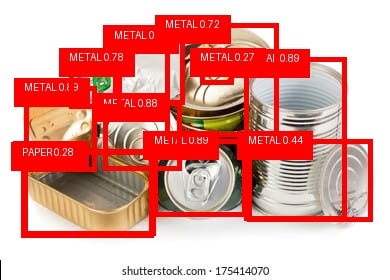

In [ ]:
from google.colab import files
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import numpy as np
import os

# USER CONFIG
CHECKPOINT_DIR = '/content/drive/MyDrive/yolov8_garbage_checkpoints'
MODEL_SIZE = 's'  # Change if your model is xs, s, m, l, x
best_model_path = os.path.join(CHECKPOINT_DIR, 'garbage_classification', f'yolov8{MODEL_SIZE}', 'weights', 'best.pt')

# Load YOLO model
model = YOLO(best_model_path)

# REAL CLASSES ONLY — UPDATE THESE ACCORDING TO YOUR data.yaml
DISPOSAL_SUGGESTIONS = {
    "BIODEGRADABLE": "Compost.",
    "CARDBOARD": "Recycle.",
    "GLASS": "Rinse & recycle.",
    "METAL": "Recycle metal.",
    "PAPER": "Recycle or compost if soiled.",
    "PLASTIC": "Recycle if clean."
}

def annotate(image_path, results, out_path=None):
    pil = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(pil)

    # BIGGER FONT
    try:
        font = ImageFont.truetype("DejaVuSans.ttf", 32)
    except:
        font = ImageFont.load_default()

    detected_classes = set()

    for r in results:
        if hasattr(r, "boxes") and len(r.boxes) > 0:
            xyxy = r.boxes.xyxy.cpu().numpy()
            confs = r.boxes.conf.cpu().numpy()
            cls_idxs = r.boxes.cls.cpu().numpy().astype(int)

            for i, box in enumerate(xyxy):
                x1, y1, x2, y2 = box.tolist()
                conf = float(confs[i])
                cls_idx = int(cls_idxs[i])
                cls_name = r.names[cls_idx]

                detected_classes.add(cls_name)

                label = f"{cls_name} {conf:.2f}"

                # BIGGER BOUNDING BOX
                draw.rectangle([x1, y1, x2, y2], outline="red", width=5)

                # BIGGER TEXT BACKGROUND
                text_bbox = draw.textbbox((x1, y1), label, font=font)
                text_bg = [
                    text_bbox[0] - 10,
                    text_bbox[1] - 10,
                    text_bbox[2] + 10,
                    text_bbox[3] + 10
                ]
                draw.rectangle(text_bg, fill="red")

                # DRAW BIGGER TEXT
                draw.text((x1, y1 - 5), label, fill="white", font=font)

    # Save output
    out_file = out_path or image_path.replace(".jpg", "_annotated.jpg")
    pil.save(out_file, quality=95)
    return out_file

# ---- USER UPLOAD ----
uploaded = files.upload()

for filename in uploaded:
    results = model(filename)
    out = annotate(filename, results)
    print("Saved:", out)
    display(Image.open(out))

Saving WhatsApp Image 2025-11-19 at 2.23.17 PM (2).jpeg to WhatsApp Image 2025-11-19 at 2.23.17 PM (2).jpeg

image 1/1 /content/WhatsApp Image 2025-11-19 at 2.23.17 PM (2).jpeg: 480x640 38 BIODEGRADABLEs, 4 METALs, 476.0ms
Speed: 15.7ms preprocess, 476.0ms inference, 4.9ms postprocess per image at shape (1, 3, 480, 640)
Saved: WhatsApp Image 2025-11-19 at 2.23.17 PM (2).jpeg


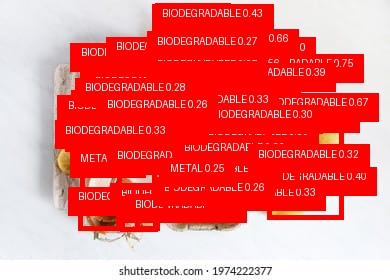

In [ ]:
from google.colab import files
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import numpy as np
import os

# USER CONFIG
CHECKPOINT_DIR = '/content/drive/MyDrive/yolov8_garbage_checkpoints'
MODEL_SIZE = 's'  # Change if your model is xs, s, m, l, x
best_model_path = os.path.join(CHECKPOINT_DIR, 'garbage_classification', f'yolov8{MODEL_SIZE}', 'weights', 'best.pt')

# Load YOLO model
model = YOLO(best_model_path)

# REAL CLASSES ONLY — UPDATE THESE ACCORDING TO YOUR data.yaml
DISPOSAL_SUGGESTIONS = {
    "BIODEGRADABLE": "Compost.",
    "CARDBOARD": "Recycle.",
    "GLASS": "Rinse & recycle.",
    "METAL": "Recycle metal.",
    "PAPER": "Recycle or compost if soiled.",
    "PLASTIC": "Recycle if clean."
}

def annotate(image_path, results, out_path=None):
    pil = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(pil)

    # BIGGER FONT
    try:
        font = ImageFont.truetype("DejaVuSans.ttf", 32)
    except:
        font = ImageFont.load_default()

    detected_classes = set()

    for r in results:
        if hasattr(r, "boxes") and len(r.boxes) > 0:
            xyxy = r.boxes.xyxy.cpu().numpy()
            confs = r.boxes.conf.cpu().numpy()
            cls_idxs = r.boxes.cls.cpu().numpy().astype(int)

            for i, box in enumerate(xyxy):
                x1, y1, x2, y2 = box.tolist()
                conf = float(confs[i])
                cls_idx = int(cls_idxs[i])
                cls_name = r.names[cls_idx]

                detected_classes.add(cls_name)

                label = f"{cls_name} {conf:.2f}"

                # BIGGER BOUNDING BOX
                draw.rectangle([x1, y1, x2, y2], outline="red", width=5)

                # BIGGER TEXT BACKGROUND
                text_bbox = draw.textbbox((x1, y1), label, font=font)
                text_bg = [
                    text_bbox[0] - 10,
                    text_bbox[1] - 10,
                    text_bbox[2] + 10,
                    text_bbox[3] + 10
                ]
                draw.rectangle(text_bg, fill="red")

                # DRAW BIGGER TEXT
                draw.text((x1, y1 - 5), label, fill="white", font=font)

    # Save output
    out_file = out_path or image_path.replace(".jpg", "_annotated.jpg")
    pil.save(out_file, quality=95)
    return out_file

# ---- USER UPLOAD ----
uploaded = files.upload()

for filename in uploaded:
    results = model(filename)
    out = annotate(filename, results)
    print("Saved:", out)
    display(Image.open(out))

Saving WhatsApp Image 2025-11-19 at 2.23.18 PM (1).jpeg to WhatsApp Image 2025-11-19 at 2.23.18 PM (1).jpeg

image 1/1 /content/WhatsApp Image 2025-11-19 at 2.23.18 PM (1).jpeg: 512x640 4 CARDBOARDs, 8 GLASSs, 5 METALs, 4 PLASTICs, 432.1ms
Speed: 7.0ms preprocess, 432.1ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 640)
Saved: WhatsApp Image 2025-11-19 at 2.23.18 PM (1).jpeg


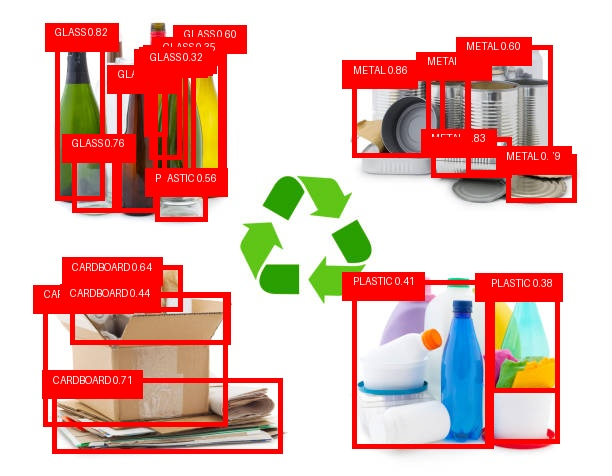

In [ ]:
from google.colab import files
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import numpy as np
import os

# USER CONFIG
CHECKPOINT_DIR = '/content/drive/MyDrive/yolov8_garbage_checkpoints'
MODEL_SIZE = 's'  # Change if your model is xs, s, m, l, x
best_model_path = os.path.join(CHECKPOINT_DIR, 'garbage_classification', f'yolov8{MODEL_SIZE}', 'weights', 'best.pt')

# Load YOLO model
model = YOLO(best_model_path)

# REAL CLASSES ONLY — UPDATE THESE ACCORDING TO YOUR data.yaml
DISPOSAL_SUGGESTIONS = {
    "BIODEGRADABLE": "Compost.",
    "CARDBOARD": "Recycle.",
    "GLASS": "Rinse & recycle.",
    "METAL": "Recycle metal.",
    "PAPER": "Recycle or compost if soiled.",
    "PLASTIC": "Recycle if clean."
}

def annotate(image_path, results, out_path=None):
    pil = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(pil)

    # BIGGER FONT
    try:
        font = ImageFont.truetype("DejaVuSans.ttf", 32)
    except:
        font = ImageFont.load_default()

    detected_classes = set()

    for r in results:
        if hasattr(r, "boxes") and len(r.boxes) > 0:
            xyxy = r.boxes.xyxy.cpu().numpy()
            confs = r.boxes.conf.cpu().numpy()
            cls_idxs = r.boxes.cls.cpu().numpy().astype(int)

            for i, box in enumerate(xyxy):
                x1, y1, x2, y2 = box.tolist()
                conf = float(confs[i])
                cls_idx = int(cls_idxs[i])
                cls_name = r.names[cls_idx]

                detected_classes.add(cls_name)

                label = f"{cls_name} {conf:.2f}"

                # BIGGER BOUNDING BOX
                draw.rectangle([x1, y1, x2, y2], outline="red", width=5)

                # BIGGER TEXT BACKGROUND
                text_bbox = draw.textbbox((x1, y1), label, font=font)
                text_bg = [
                    text_bbox[0] - 10,
                    text_bbox[1] - 10,
                    text_bbox[2] + 10,
                    text_bbox[3] + 10
                ]
                draw.rectangle(text_bg, fill="red")

                # DRAW BIGGER TEXT
                draw.text((x1, y1 - 5), label, fill="white", font=font)

    # Save output
    out_file = out_path or image_path.replace(".jpg", "_annotated.jpg")
    pil.save(out_file, quality=95)
    return out_file

# ---- USER UPLOAD ----
uploaded = files.upload()

for filename in uploaded:
    results = model(filename)
    out = annotate(filename, results)
    print("Saved:", out)
    display(Image.open(out))

Saving WhatsApp Image 2025-11-19 at 2.23.19 PM.jpeg to WhatsApp Image 2025-11-19 at 2.23.19 PM (3).jpeg

image 1/1 /content/WhatsApp Image 2025-11-19 at 2.23.19 PM (3).jpeg: 416x640 1 GLASS, 7 METALs, 1 PAPER, 498.8ms
Speed: 2.0ms preprocess, 498.8ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 640)
Saved: WhatsApp Image 2025-11-19 at 2.23.19 PM (3).jpeg


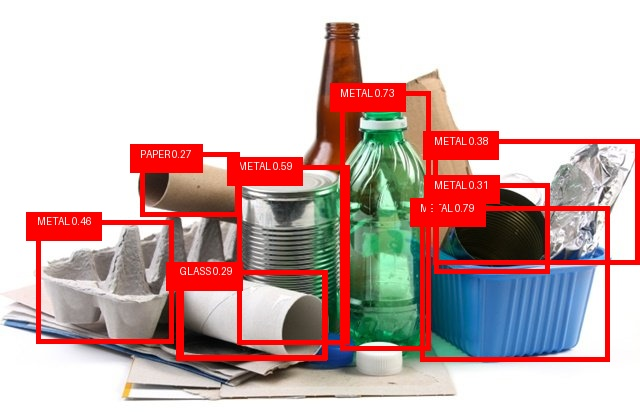

In [ ]:
from google.colab import files
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import numpy as np
import os

# USER CONFIG
CHECKPOINT_DIR = '/content/drive/MyDrive/yolov8_garbage_checkpoints'
MODEL_SIZE = 's'  # Change if your model is xs, s, m, l, x
best_model_path = os.path.join(CHECKPOINT_DIR, 'garbage_classification', f'yolov8{MODEL_SIZE}', 'weights', 'best.pt')

# Load YOLO model
model = YOLO(best_model_path)

# REAL CLASSES ONLY — UPDATE THESE ACCORDING TO YOUR data.yaml
DISPOSAL_SUGGESTIONS = {
    "BIODEGRADABLE": "Compost.",
    "CARDBOARD": "Recycle.",
    "GLASS": "Rinse & recycle.",
    "METAL": "Recycle metal.",
    "PAPER": "Recycle or compost if soiled.",
    "PLASTIC": "Recycle if clean."
}

def annotate(image_path, results, out_path=None):
    pil = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(pil)

    # BIGGER FONT
    try:
        font = ImageFont.truetype("DejaVuSans.ttf", 32)
    except:
        font = ImageFont.load_default()

    detected_classes = set()

    for r in results:
        if hasattr(r, "boxes") and len(r.boxes) > 0:
            xyxy = r.boxes.xyxy.cpu().numpy()
            confs = r.boxes.conf.cpu().numpy()
            cls_idxs = r.boxes.cls.cpu().numpy().astype(int)

            for i, box in enumerate(xyxy):
                x1, y1, x2, y2 = box.tolist()
                conf = float(confs[i])
                cls_idx = int(cls_idxs[i])
                cls_name = r.names[cls_idx]

                detected_classes.add(cls_name)

                label = f"{cls_name} {conf:.2f}"

                # BIGGER BOUNDING BOX
                draw.rectangle([x1, y1, x2, y2], outline="red", width=5)

                # BIGGER TEXT BACKGROUND
                text_bbox = draw.textbbox((x1, y1), label, font=font)
                text_bg = [
                    text_bbox[0] - 10,
                    text_bbox[1] - 10,
                    text_bbox[2] + 10,
                    text_bbox[3] + 10
                ]
                draw.rectangle(text_bg, fill="red")

                # DRAW BIGGER TEXT
                draw.text((x1, y1 - 5), label, fill="white", font=font)

    # Save output
    out_file = out_path or image_path.replace(".jpg", "_annotated.jpg")
    pil.save(out_file, quality=95)
    return out_file

# ---- USER UPLOAD ----
uploaded = files.upload()

for filename in uploaded:
    results = model(filename)
    out = annotate(filename, results)
    print("Saved:", out)
    display(Image.open(out))